In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm
import json
import numpy as np
from report import read_dfs, index_dfs
from report import generate_bar_chart, generate_bar_chart_overlay
from report import report_gridsearch
from report import read_accs
from report import cifar10_files as files

np.set_printoptions(suppress=True, linewidth=np.inf)
plt.rcParams.update({'font.size': 6})


# Core attacks

In [3]:
attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']

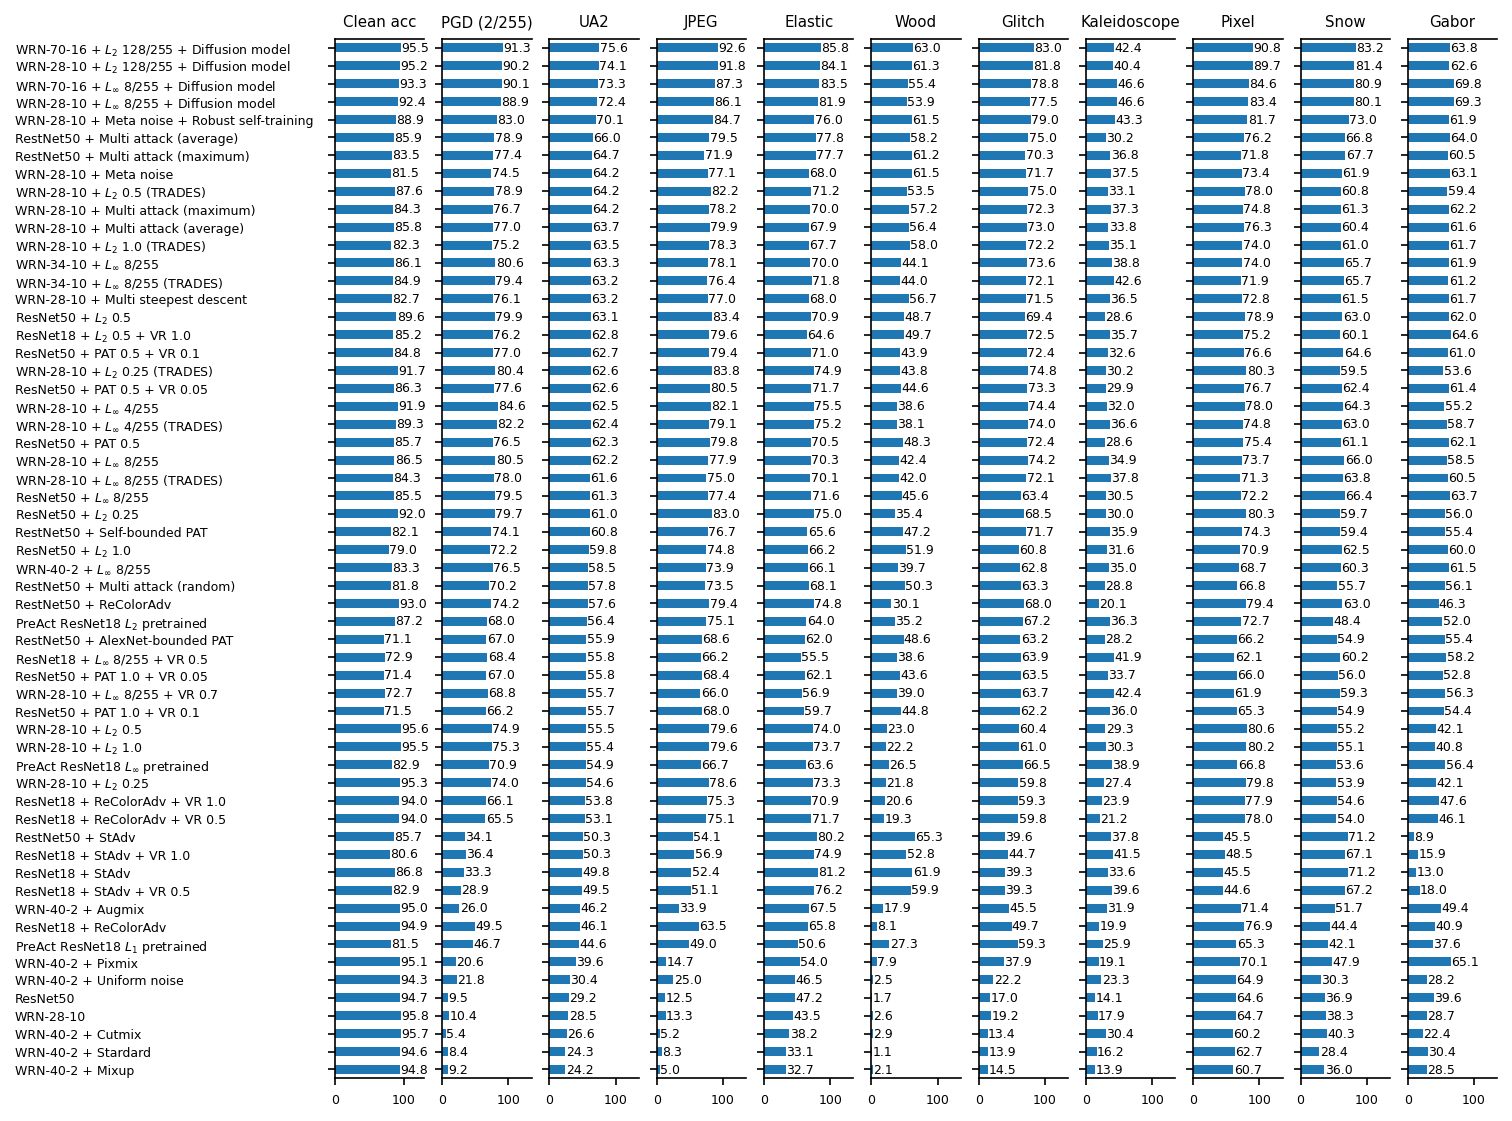

In [4]:
logdir = 'results/cifar10'
distortion = 'low'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df = df.rename(columns=lambda x: 'JPEG' if x == 'jpeg' else 'FBM' if x == 'fbm' else 'Kaleidoscope' if x == 'kaleidoscope' else 'HSV' if x == 'hsv' else 'PGD' if x == 'pgd' else x.capitalize())

df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (2/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

df = df.sort_values('UA2', ascending=False)


generate_bar_chart_overlay(df, file_name=f'UA2_cifar10_{distortion}.pdf', \
                           figsize=(10, 9), xlim=135, yticks_padding=150, \
                           plot_height=0.95, xlim0=130)
df.to_csv(f'UA2_cifar10_{distortion}.csv', index=True)

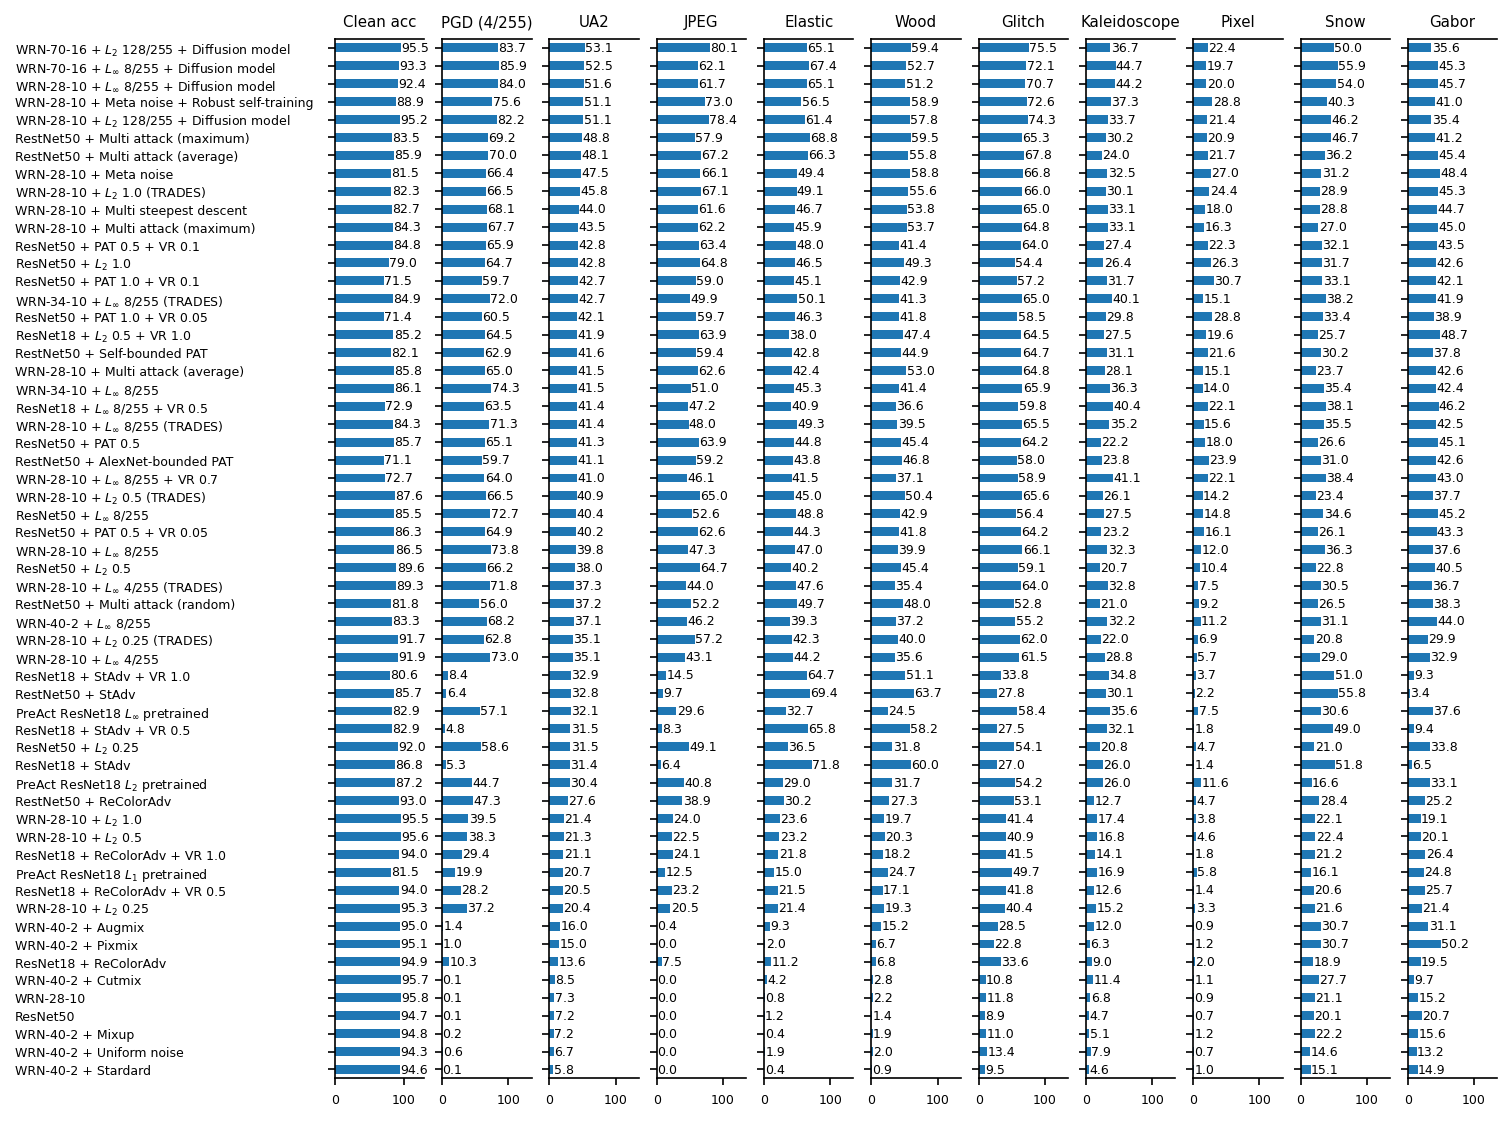

In [5]:
distortion = 'medium'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df = df.rename(columns=lambda x: 'JPEG' if x == 'jpeg' else 'FBM' if x == 'fbm' else 'Kaleidoscope' if x == 'kaleidoscope' else 'HSV' if x == 'hsv' else 'PGD' if x == 'pgd' else x.capitalize())
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (4/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

df = df.sort_values('UA2', ascending=False)

generate_bar_chart_overlay(df, file_name=f'UA2_cifar10_{distortion}.pdf', \
                           figsize=(10, 9), xlim=135, yticks_padding=150, \
                           plot_height=0.95, xlim0=130)
df.to_csv(f'UA2_cifar10_{distortion}.csv', index=True)

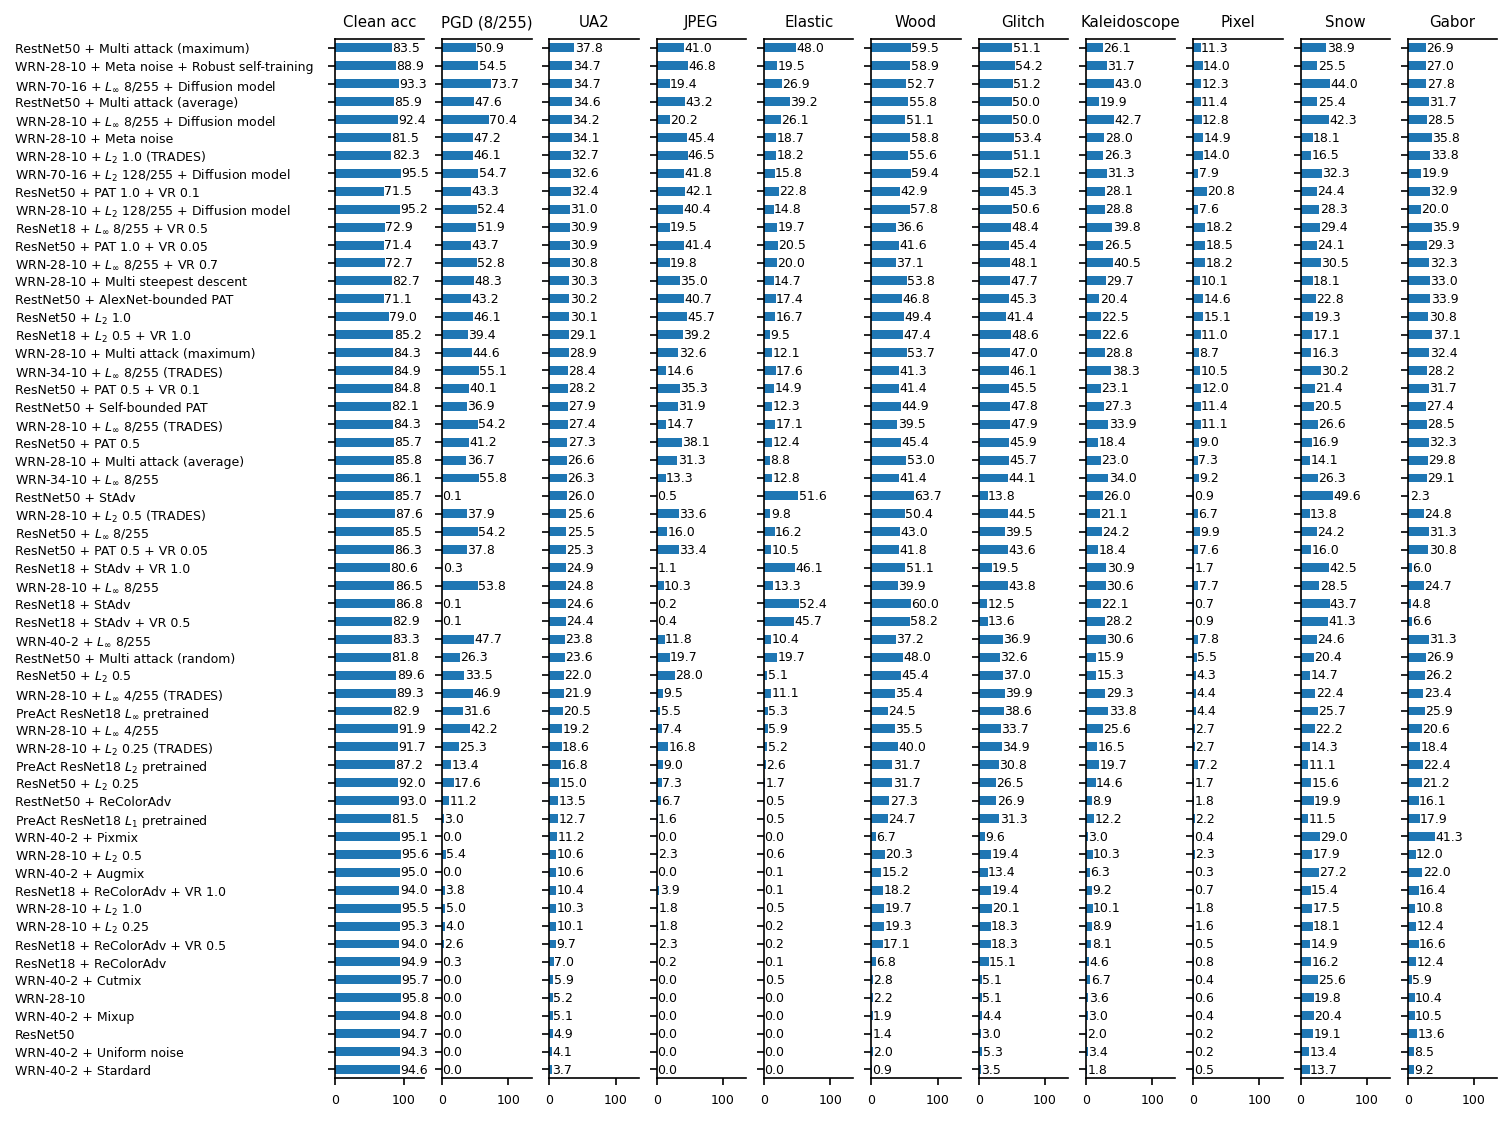

In [6]:
distortion = 'high'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df = df.rename(columns=lambda x: 'JPEG' if x == 'jpeg' else 'FBM' if x == 'fbm' else 'Kaleidoscope' if x == 'kaleidoscope' else 'HSV' if x == 'hsv' else 'PGD' if x == 'pgd' else x.capitalize())
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (8/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

df = df.sort_values('UA2', ascending=False)

generate_bar_chart_overlay(df, file_name=f'UA2_cifar10_{distortion}.pdf', \
                           figsize=(10, 9), xlim=135, yticks_padding=150, \
                           plot_height=0.95, xlim0=130)
df.to_csv(f'UA2_cifar10_{distortion}.csv', index=True)

# Extra attacks

In [7]:
attacks = "edge fbm fog hsv klotski mix polkadot prison blur texture whirlpool".split()

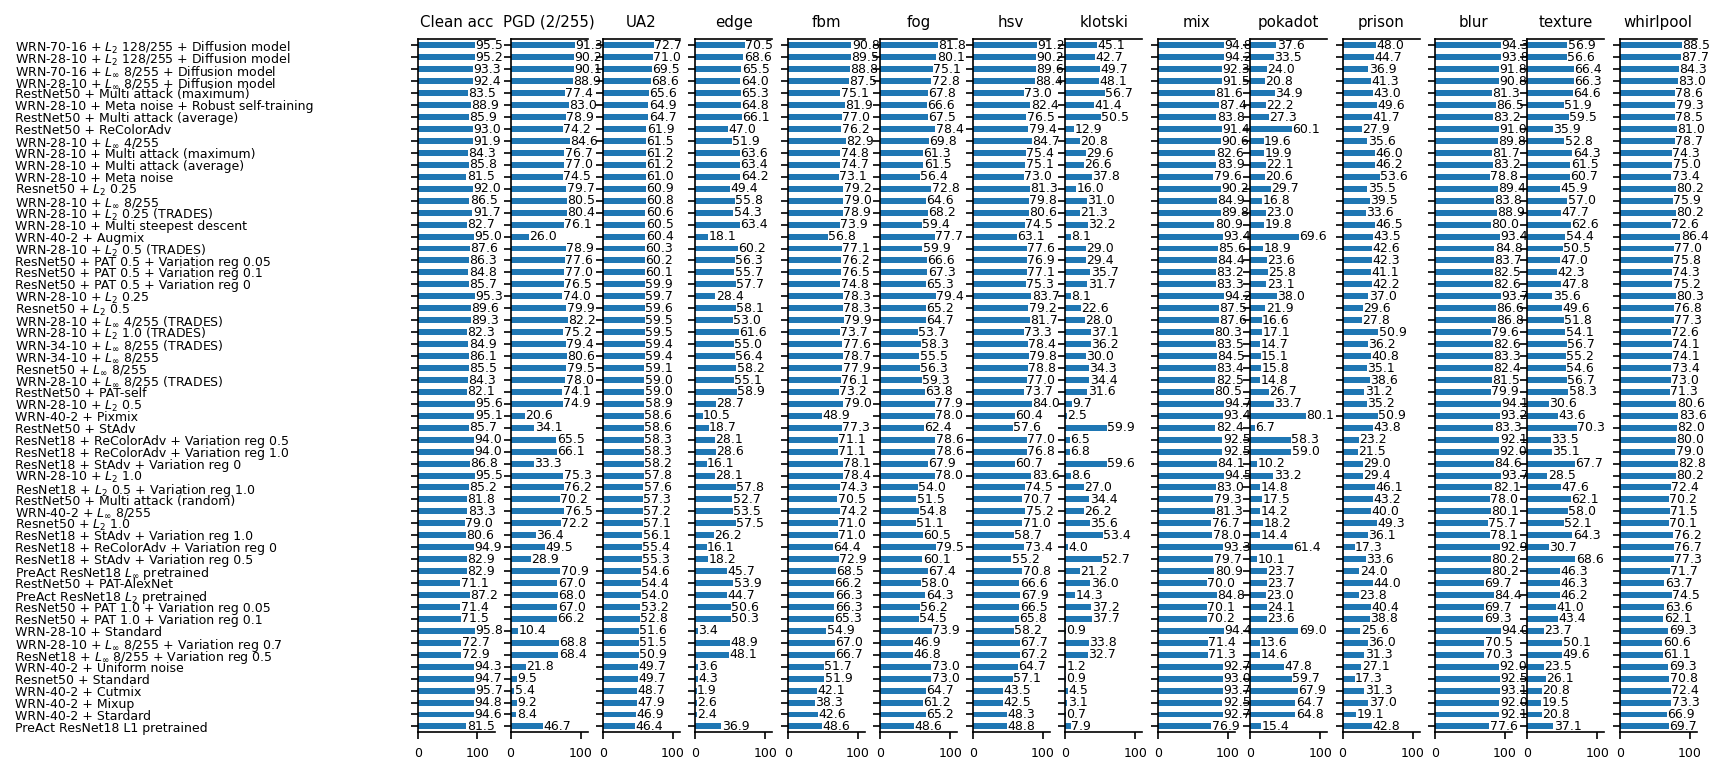

In [8]:
logdir = 'results/cifar10'
distortion = 'low'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (2/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

df = df.sort_values('UA2', ascending=False)

generate_bar_chart_overlay(df, file_name=f'UA2_cifar10_{distortion}.pdf', \
                           figsize=(11, 6), xlim=110, yticks_padding=190, \
                           plot_height=0.95, xlim0=130)

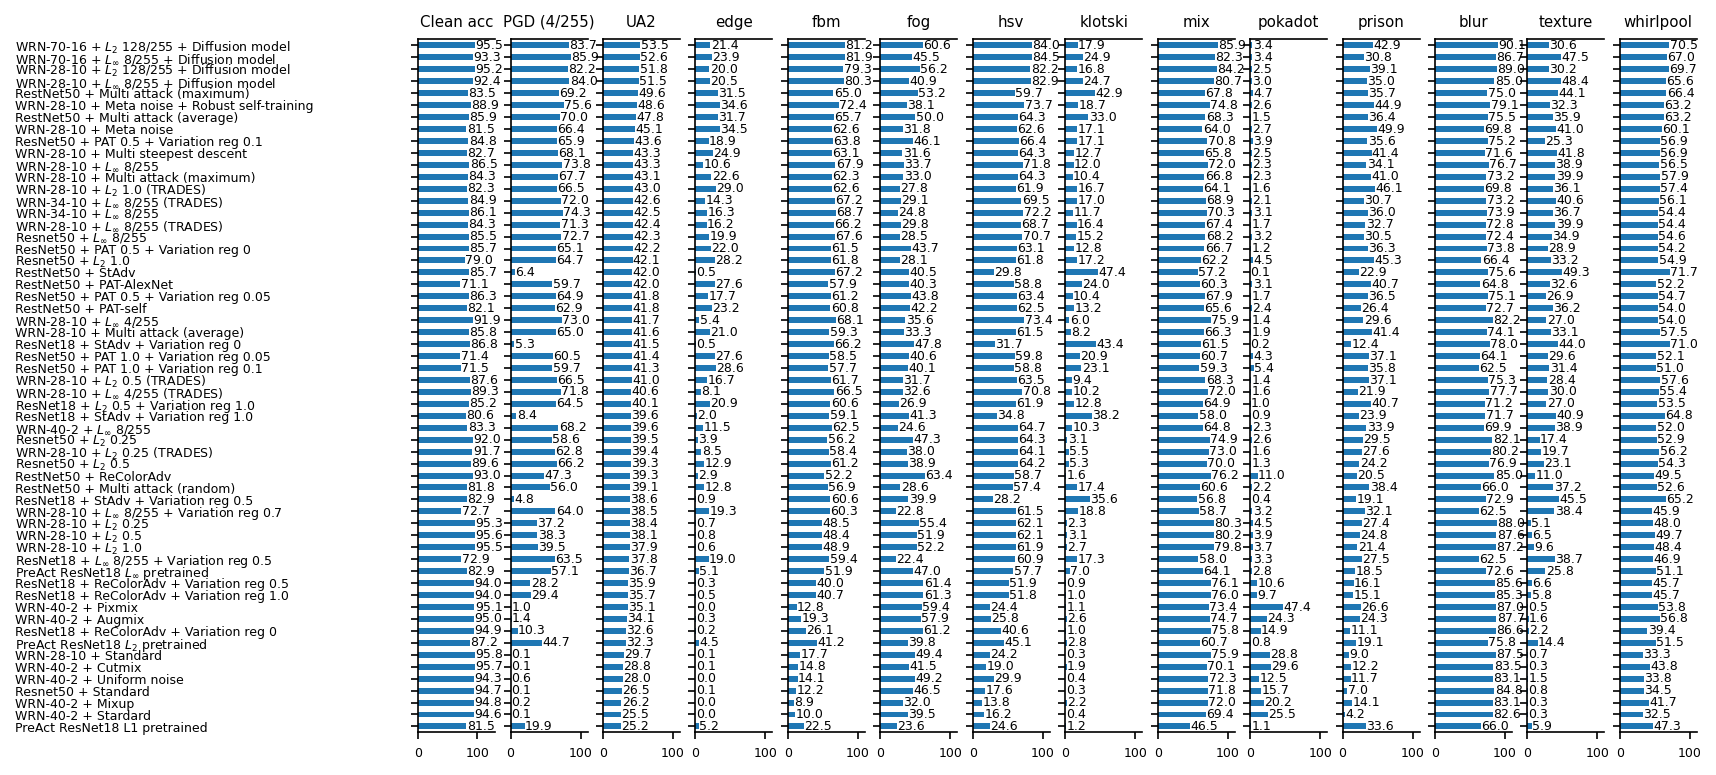

In [9]:
logdir = 'results/cifar10'
distortion = 'medium'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (4/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

df = df.sort_values('UA2', ascending=False)

generate_bar_chart_overlay(df, file_name=f'UA2_cifar10_{distortion}.pdf', \
                           figsize=(11, 6), xlim=110, yticks_padding=190, \
                           plot_height=0.95, xlim0=130)

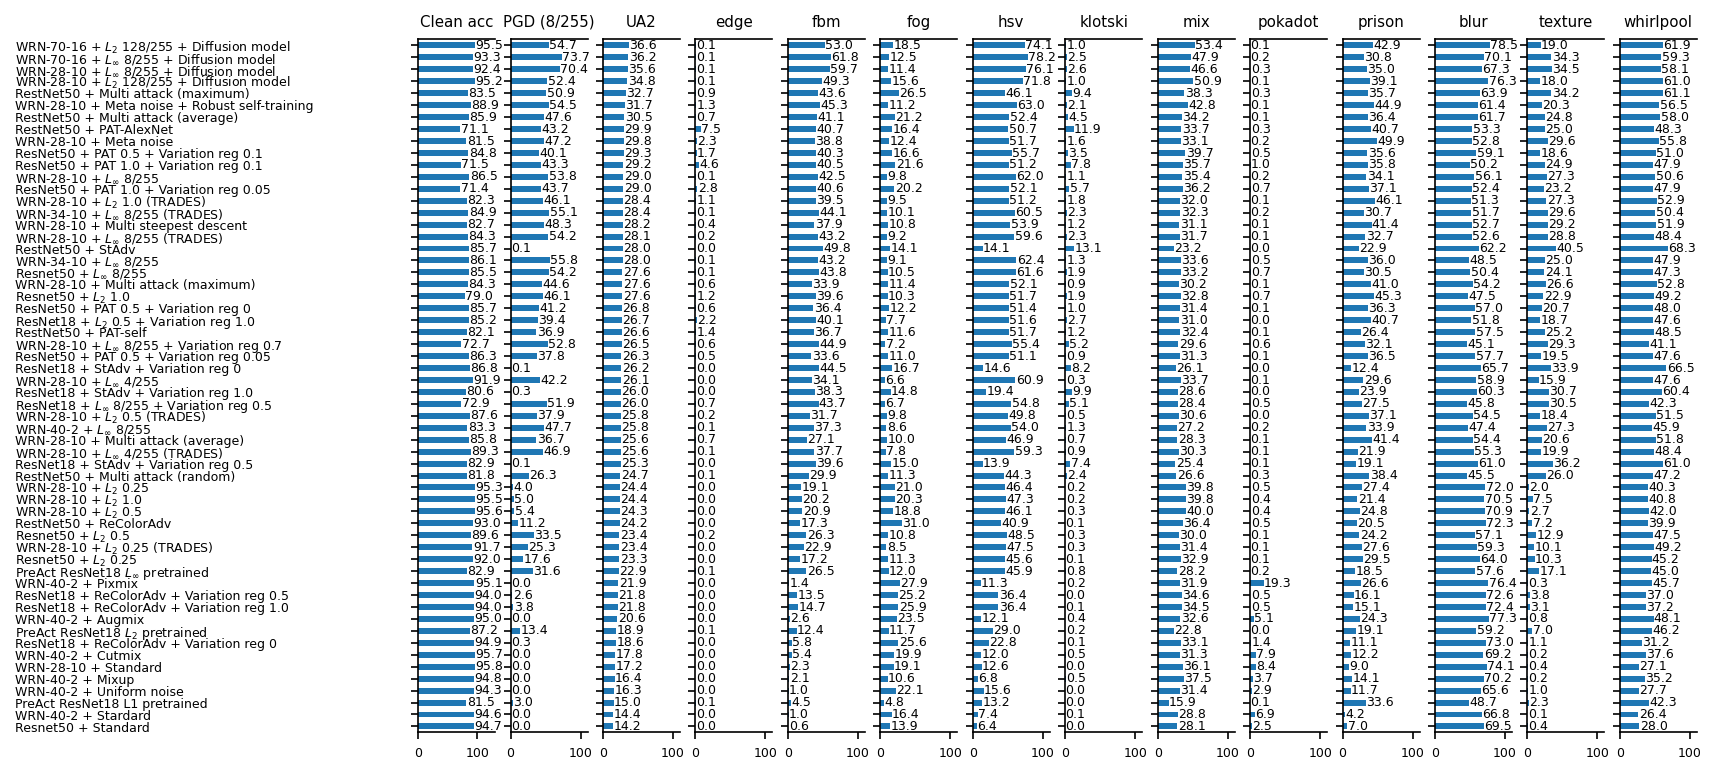

In [10]:
logdir = 'results/cifar10'
distortion = 'high'
series = []
for attack in attacks:
    logfiles = [os.path.join(logdir, f'{f}-{attack}-{distortion}.jsonl') for f in files]
    series.append(read_accs(*logfiles, name=attack))
df = pd.concat(series, axis=1).reindex(series[0].index)
df.insert(0, 'UA2', df.mean(axis=1).round(2))

logfiles = [os.path.join(logdir, f'{f}-pgd-{distortion}.jsonl') for f in files]
df.insert(0, 'PGD (8/255)', read_accs(*logfiles, name=None))

logfiles = [os.path.join(logdir, f'{f}-none-{distortion}.jsonl') for f in files]
df.insert(0, 'Clean acc', read_accs(*logfiles, name=None))

df = df.sort_values('UA2', ascending=False)

generate_bar_chart_overlay(df, file_name=f'UA2_cifar10_{distortion}.pdf', \
                           figsize=(11, 6), xlim=110, yticks_padding=190, \
                           plot_height=0.95, xlim0=130)